In [1]:
import numpy as np
import pandas as pd
# import torch
# import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os 
import glob
from pathlib import Path
from PIL import Image

In [3]:
from math import floor as lb

In [4]:
import cv2

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import tensorflow as tf

In [7]:
import keras

In [8]:
from torchvision import transforms as transforms

In [9]:
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D,ZeroPadding2D
from tensorflow.keras.models import Model, load_model
from keras.models import Sequential

In [10]:
train_paths = "../input/overnight-hackathon/Train_Images/Train_Images/"
test_paths = "../input/overnight-hackathon/Test_Image/Test_Image/"

In [11]:
age = []
gender = []
image_path = []
paths_tr = os.listdir(train_paths)
for path in paths_tr:
    image_path.append(path)
    gender.append(str(path.split("_")[3]))
    age.append((int((path.split("_")[4]).split(".")[0])))
    
    
collect  = list(zip(image_path,gender,age))
train_df = pd.DataFrame(collect)
train_df.head()

,0,1,2
0,IMG_24111_FI_F_15.png,F,15
1,IMG_8632_HI_F_18.jpg,F,18
2,IMG_2616_HI_F_29.jpg,F,29
3,IMG_16192_FI_M_33.jpg,M,33
4,IMG_18600_FI_M_22.png,M,22


In [12]:
train_df["img_path"] = train_df[0]
train_df["gen"] = train_df[1]
train_df["age"] = train_df[2]
train_df.drop([0,1,2],axis=1,inplace=True)


In [13]:
train_df.head()

,img_path,gen,age
0,IMG_24111_FI_F_15.png,F,15
1,IMG_8632_HI_F_18.jpg,F,18
2,IMG_2616_HI_F_29.jpg,F,29
3,IMG_16192_FI_M_33.jpg,M,33
4,IMG_18600_FI_M_22.png,M,22


In [14]:
## NOT NEEDED

# gender = []
# image_path = []
# paths_tr = os.listdir(test_paths)
# for path in paths_tr:
#     image_path.append(path)
#     gender.append(str(path.split("_")[3].split(".")[0]))
    
    
# collect_test  = list(zip(image_path,gender))
# test_df = pd.DataFrame(collect_test)
# test_df.head()

In [15]:
# test_df["img_file"] = test_df[0]
# test_df["gen"] = test_df[1]
# test_df.drop([0,1],axis=1,inplace=True)

In [16]:

# test_df.head()

In [17]:
test_csv = pd.read_csv("../input/overnight-hackathon/Test_Data.csv")
test_df = pd.DataFrame(test_csv)

In [18]:
test_df.head()

,img_file
0,IMG_10000_HI_M.jpg
1,IMG_10001_FI_F.jpg
2,IMG_10002_FI_F.jpg
3,IMG_10003_FI_F.jpg
4,IMG_10004_FI_M.jpeg


In [19]:
for i in range(len(test_df)):
    test_df.loc[i,"gen"] = ((test_df.loc[i,"img_file"]).split("_")[3]).split(".")[0]

In [20]:
test_df.head()

,img_file,gen
0,IMG_10000_HI_M.jpg,M
1,IMG_10001_FI_F.jpg,F
2,IMG_10002_FI_F.jpg,F
3,IMG_10003_FI_F.jpg,F
4,IMG_10004_FI_M.jpeg,M


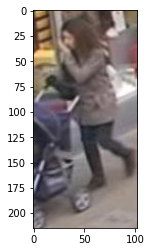

In [21]:
img = Image.open(test_paths+test_df.img_file[1])
plt.imshow(img)


In [22]:
train_df.isnull().any()

img_path    False
gen         False
age         False
dtype: bool

In [23]:
test_df.isnull().any()

img_file    False
gen         False
dtype: bool

In [24]:
print(train_df.dtypes,test_df.dtypes)

img_path    object
gen         object
age          int64
dtype: object img_file    object
gen         object
dtype: object


In [25]:
print(test_df.gen.unique())

['M' 'F']


In [26]:
dummy = pd.get_dummies(train_df["gen"])
train_df = pd.merge(left = train_df,right =dummy,left_index = True,right_index = True)
train_df.drop("gen",axis=1,inplace =True)

In [27]:
dummy_test = pd.get_dummies(test_df["gen"])
test_df = pd.merge(left = test_df,right = dummy_test,left_index =True,right_index = True)
test_df.drop("gen",axis=1,inplace =True)

In [28]:
test_df.head()

,img_file,F,M
0,IMG_10000_HI_M.jpg,0,1
1,IMG_10001_FI_F.jpg,1,0
2,IMG_10002_FI_F.jpg,1,0
3,IMG_10003_FI_F.jpg,1,0
4,IMG_10004_FI_M.jpeg,0,1


In [29]:
test_df.head()

,img_file,F,M
0,IMG_10000_HI_M.jpg,0,1
1,IMG_10001_FI_F.jpg,1,0
2,IMG_10002_FI_F.jpg,1,0
3,IMG_10003_FI_F.jpg,1,0
4,IMG_10004_FI_M.jpeg,0,1


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

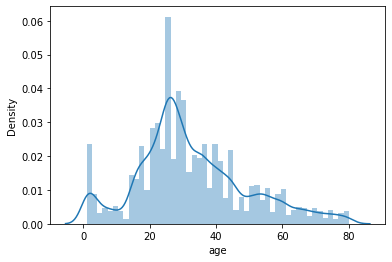

In [30]:
sns.distplot(train_df.age)

In [31]:
train ,val = train_test_split(train_df , train_size =0.8 )

In [32]:
train.head()

,img_path,age,F,M
6517,IMG_27522_FI_M_23.jpg,23,0,1
23544,IMG_4951_FI_F_25.jpeg,25,1,0
2769,IMG_24014_HI_F_25.jpg,25,1,0
21220,IMG_22193_HI_M_51.jpg,51,0,1
29010,IMG_5150_HI_M_54.jpg,54,0,1


In [33]:
print(train.shape,val.shape)

(23597, 4) (5900, 4)


In [34]:

dim = (128,128)
x_train, x_test = [], []
for file in train.img_path:
    img = cv2.imread(train_paths +file)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img = np.array(img)
    x_train.append(img)

# x_train = np.array(x_train)

# x_train = x_train.reshape(len(x_train), 128,128,1)


# x_val = np.array(x_val)

# x_test = x_test.reshape(len(x_test),128,128,1)




In [35]:

for file in val.img_path:
    img = cv2.imread(train_paths +file)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img = np.array(img)
    x_test.append(img)

In [36]:
li = np.array(x_train)

In [37]:
li2 = np.array(x_test)

In [38]:
li2.shape

(5900, 128, 128, 3)

In [39]:
age_train = np.array(train.age)
age_test = np.array(val.age)

In [40]:
ip_size = (128,128,3)

In [41]:
inputs = Input((ip_size))

In [42]:


model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                  input_shape=(128,128,3),
                  pooling='avg',classes=None,
                  weights=None)
for layer in pretrained_model.layers:
       layer.trainable=False

model.add(pretrained_model)



In [43]:
model.compile(optimizer = 'adam', loss =['mse'])
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))

In [44]:
X = Conv2D(64, (3, 3), activation='relu', kernel_initializer = glorot_uniform(seed=0))(inputs)
X = BatchNormalization(axis = 3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

X = Flatten()(X)

dense_2 = Dense(256, activation='relu' )(X)
dense_3 = Dense(128, activation='relu' )(dense_2)

dropout_2 = Dropout(0.4)(dense_3)

output_2 = Dense(1, activation='relu', name='age_output')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_2])

In [45]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 256)       295168

In [46]:
model.compile(optimizer = 'Adam',loss = 'mse')
history = model.fit(x=li,y=age_train,validation_split=0.2,epochs = 16, batch_size=128,shuffle = True)

Epoch 1/16
148/148 [==============================] - 16s 58ms/step - loss: 549.6219 - val_loss: 257.0572
Epoch 2/16
148/148 [==============================] - 7s 50ms/step - loss: 236.1322 - val_loss: 186.0720
Epoch 3/16
148/148 [==============================] - 8s 51ms/step - loss: 206.0917 - val_loss: 208.7244
Epoch 4/16
148/148 [==============================] - 7s 50ms/step - loss: 178.8884 - val_loss: 163.0818
Epoch 5/16
148/148 [==============================] - 7s 50ms/step - loss: 161.5361 - val_loss: 233.3333
Epoch 6/16
148/148 [==============================] - 7s 50ms/step - loss: 152.8819 - val_loss: 263.7325
Epoch 7/16
148/148 [==============================] - 7s 50ms/step - loss: 143.4138 - val_loss: 184.7675
Epoch 8/16
148/148 [==============================] - 7s 50ms/step - loss: 131.0929 - val_loss: 117.9690
Epoch 9/16
148/148 [==============================] - 8s 51ms/step - loss: 123.6247 - val_loss: 123.1078
Epoch 10/16
148/148 [==============================] -

In [47]:
index=1438
print("Original: Age = " ,age_test[index])

pred = model.predict(li2[index].reshape(1,128, 128, 3))

print(pred.mean())

Original: Age =  67
35.20833


In [48]:
X_pred = []
for file in test_df.img_file:
    t_img = cv2.imread(test_paths+file)
    t_img = cv2.cvtColor(t_img,cv2.COLOR_BGR2RGB)
    t_img = cv2.resize(t_img,dim, interpolation = cv2.INTER_AREA)
    X_pred.append(np.array(t_img))

In [49]:
li3 = np.array(X_pred)

In [50]:
li3.shape

(12642, 128, 128, 3)

In [51]:
Y_pred = []
for index in range(len(X_pred)):
    pred=model.predict(X_pred[index].reshape(1,128,128,3))
    pred=lb(pred.mean())
    Y_pred.append(pred)

In [52]:
new_df = test_df.drop(["F","M"],axis=1)

In [53]:
new_df.head()

,img_file
0,IMG_10000_HI_M.jpg
1,IMG_10001_FI_F.jpg
2,IMG_10002_FI_F.jpg
3,IMG_10003_FI_F.jpg
4,IMG_10004_FI_M.jpeg


In [54]:
img = cv2.imread(test_paths+new_df.img_file[1])

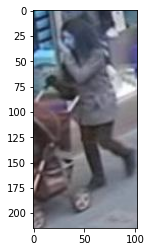

In [55]:
plt.imshow(img)

In [56]:
new_df["age"] = Y_pred

In [57]:
new_df.head()

,img_file,age
0,IMG_10000_HI_M.jpg,24
1,IMG_10001_FI_F.jpg,33
2,IMG_10002_FI_F.jpg,32
3,IMG_10003_FI_F.jpg,23
4,IMG_10004_FI_M.jpeg,32


In [58]:
new_df.to_csv("atlast.csv",index = False)

In [59]:
new_df.shape

(12642, 2)